# matplotlib

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## 拟合例子

In [2]:
import numpy as np
from scipy.optimize import curve_fit
#创建函数 f(x)=ax+b 
def func(x, a, b): 
    return a * x + b 
# 创建干静数据 
x = np.linspace(0, 5, 50) 
y = func(x, 1, 2) 
# 添加噪声 
yn = y + 0.9 * np.random.normal(size=len(x))
# 拟合噪声数据 
popt, pcov = curve_fit(func, x, yn)
# 输出最优参数 
print(popt)

[ 0.96195256  2.30843925]


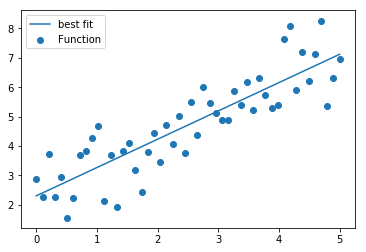

In [3]:
scater = plt.scatter(x, yn)
line = plt.plot(x , func(x, *popt))
scater.set_label('Function')
line[0].set_label('best fit')
plt.legend()

## 拟合例子

In [4]:
# 创建函数 
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
# 添加噪声
ydata = y + 0.2 * np.random.normal(size=len(xdata))
# 拟合
popt, pcov = curve_fit(func, xdata, ydata)
# 输出最优参数
print popt

[ 2.66332402  1.27990468  0.46706829]


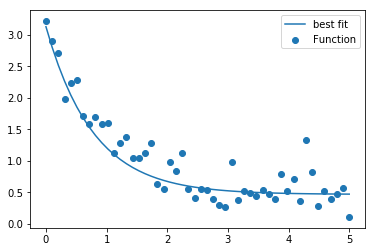

In [5]:
scater = plt.scatter(x, ydata)
line = plt.plot(x , func(x, *popt))
scater.set_label('Function')
line[0].set_label('best fit')
plt.legend()

## 求根

In [8]:
from scipy.optimize import fsolve  
lineFun = lambda x: x**2 - 2  
# 第二个参数是迭代的初值
solution = fsolve(lineFun, [-1, 1])  
# 输出f(x)=0的解
print solution

[-1.41421356  1.41421356]


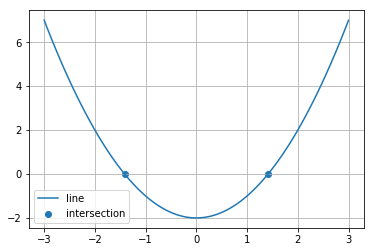

In [9]:
x = np.linspace(-3,3,100)
line = plt.plot(x, lineFun(x))
scater = plt.scatter(solution, lineFun(solution))
scater.set_label('intersection')
line[0].set_label('line')
plt.grid()
plt.legend()

## 曲线的交点

In [10]:
from scipy.optimize import fsolve
def findIntersection(func1, func2, x0): 
    return fsolve(lambda x : func1(x) - func2(x), x0) 
# 两个函数 
cosFun = lambda x : np.cos(x)
lineFun = lambda x : 0.1*x
x = np.linspace(0,10,100)
# 函数交点的x坐标
result = findIntersection(cosFun, lineFun, [2, 4.5, 8])
print result

[ 1.42755178  5.26711643  7.06889124]


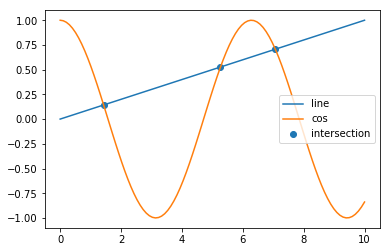

In [11]:
line = plt.plot(x, lineFun(x))
cos = plt.plot(x , cosFun(x))
scater = plt.scatter(result, lineFun(result))
scater.set_label('intersection')
line[0].set_label('line')
cos[0].set_label('cos')
plt.legend()

## 插值

In [12]:
import numpy as np
from scipy.interpolate import interp1d 
# 创建待插值的数据 
x = np.linspace(0, 10*np.pi, 20)
f1 = lambda x: np.sin(x)
y = f1(x)
# 分别用 linear 和 quadratic 插值
# 返回一个插值函数
linear=interp1d(x,y,kind='linear')
quadratic = interp1d(x, y, kind='quadratic') 
x2 = np.linspace(x.min(), x.max(), 10000) 
# 利用插值函数，进行插值
liny = linear(x2)  
quay = quadratic(x2) 

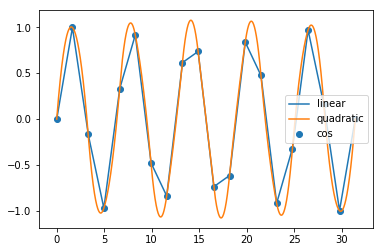

In [13]:
linline = plt.plot(x2, linear(x2))
qualine = plt.plot(x2, quadratic(x2))
scater = plt.scatter(x , f1(x))
linline[0].set_label('linear')
qualine[0].set_label('quadratic')
scater.set_label('cos')
plt.legend()

## 积分

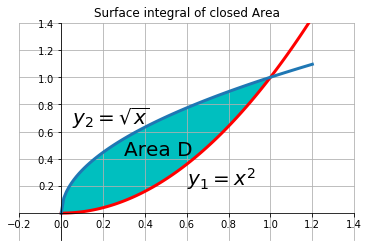

In [14]:
'''参考自https://www.douban.com/group/topic/79737307/'''
from scipy import integrate 
import numpy as np 
x=np.linspace(0,1.2,num=100)
y1,y2=x**2,np.sqrt(x) 
plt.plot(x,y1,'r',x,y2,lw=3)

ax = plt.gca()
# 设置边界线的颜色
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')
# 设置刻度所在的边界线
ax.xaxis.set_ticks_position('bottom') 
# 设置边界线的位置
ax.spines['bottom'].set_position(('data',0)) 
ax.yaxis.set_ticks_position('left') 
ax.spines['left'].set_position(('data',0))
# 设置标题
plt.title('Surface integral of closed Area') 

plt.fill_between(x, y1, y2,where=y2>=y1, facecolor='c', interpolate=True) 
plt.text(0.6, 0.2,r'$y_1=x^2$',fontsize=20) 
plt.text(0.05, 0.65,r'$y_2=\sqrt{x}$',fontsize=20,) 
plt.grid(True) 
plt.annotate('Area D', xy=(0.3,0.42),fontsize=20) 

plt.ylim(-0.2,1.4) 
plt.xlim(-0.2,1.4) 
plt.yticks([i*0.2 for i in np.arange(1,8)],[r'0.2', r'$0.4$', r'$0.6$', r'$0.8$', r'$1.0$', r'$1.2$', r'$1.4$'],fontsize=10,) 
plt.show() 

### 二重积分公式
$S_D = \int_0^1{\rm d}x\int_{\sqrt{x}}^{x^2} {\rm d}y $

In [15]:
# 一重积分
s1,abser1 = integrate.quad(lambda x:np.sqrt(x)-x**2,0,1) 
print("Area of D is %.10f" %s1)
# 二重积分，先对x积分然后对y积分
s2,abser2 = integrate.dblquad(lambda x,y: 1,0,1,lambda x :x**2,lambda x:np.sqrt(x)) 
print("Area of D is %.10f" %s2) 

Area of D is 0.3333333333
Area of D is 0.3333333333
